In [2]:
import pandas as pd
import numpy as np;
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# reading the data/ csv file
df = pd.read_csv("complaint.csv")

In [4]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Imposed a New Usage Cap of 300GB that punishe...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
# making the month column in the dataframe
df['month'] = pd.DatetimeIndex(df['Date_month_year']).month

In [6]:
# to check
df.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Imposed a New Usage Cap of 300GB that punishe...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-2015,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,12
6,361148,Throttling service and unreasonable data caps,24-06-2015,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,6
7,359792,refuses to help troubleshoot and correct my s...,23-06-2015,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,6
8,318072,extended outages,06-01-2015,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,1
9,371214,Raising Prices and Not Being Available To Ask...,28-06-2015,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,6


In [7]:
#to count the frequency of complaints in different months
df["month"].value_counts()

6     984
4     351
5     297
8      61
12     59
2      54
1      52
9      51
10     47
7      44
3      42
11     35
Name: month, dtype: int64

## 1. Produce the trend chart about the monthly registered complaints

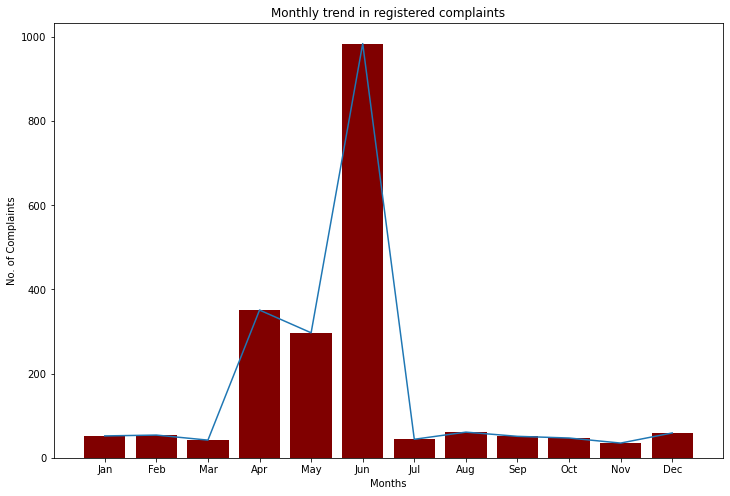

In [9]:
X = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Y = [52,54,42,351,297,984,44,61,51,47,35,59]
fig = plt.figure(figsize = (12, 8)) 
  
# creating the bar plot 
plt.bar(X, Y, color ='maroon',  
        width = 0.8) 
# creating the trend in the same graph.
plt.plot(X,Y)
  
plt.xlabel("Months") 
plt.ylabel("No. of Complaints") 
plt.title("Monthly trend in registered complaints") 
plt.show() 

## 2.  Generate a tabular output with frequencies of complaints

In [10]:
# library to get the frequency of different words in the data
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [11]:
# collecting all the data as a single string
data = ""
for i in df["Customer Complaint"]:
    data = data + i + " "

In [12]:
# printing some data to get better undersatnding
print(data[:100])

 Cable Internet Speeds Payment disappear - service got disconnected Speed and Service  Imposed a New


In [13]:
#tokenizing the words
tokens = word_tokenize(data)

In [12]:
# removing stopwords and non alpha numeric words
tokens_without_sw = [word for word in tokens if not word in stopwords.words() and word.isalnum()]

In [13]:
# making all the words as small
tokens_without_sw = [word.lower() for word in tokens_without_sw]

In [14]:
len(tokens_without_sw)

6682

In [15]:
# calculating the frequency of each appearing word
freq=nltk.FreqDist(tokens_without_sw)

In [16]:
freq

FreqDist({'internet': 510, 'service': 429, 'billing': 273, 'data': 215, 'speed': 112, 'cap': 102, 'customer': 88, 'issues': 86, 'caps': 77, 'speeds': 70, ...})

## 3.  Find which complaint types are maximum i.e., internet, network issues, etc

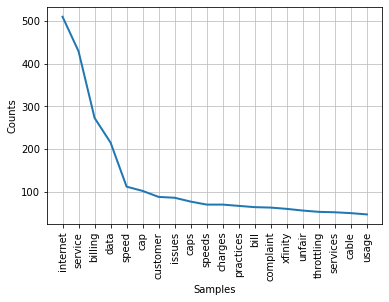

In [17]:
# plotting top 20 frequent words in the data
freq.plot(20)

### In the above plot we can see that the maximum complaints are related to internet issues, then comes the issues related to services, then billing and so on.

##  4. Provide the state wise status of complaint in the form of stacked bar

In [18]:
# no. of different states
df["State"].nunique()

42

In [19]:
# and their names
df["State"].unique()

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Oregon',
       'Massachusetts', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Florida', 'Alabama', 'Washington', 'Colorado', 'Texas',
       'New York', 'New Jersey', 'Maine', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Missouri',
       'Arkansas', 'Nevada', 'Louisiana', 'Kansas', 'Arizona',
       'North Carolina', 'District Of Columbia', 'District of Columbia',
       'Iowa'], dtype=object)

### assumption : Here I'm taking the closed and solved complaints to be Resolved and rest tags in the category of unresolved complaints.

In [16]:
# lists that will contain the corresponding status complaints
closed = []
country_closed = []
Open = []
country_open = []
solved = []
country_solved = []
pending = []
country_pending = []
# dictionary to store resolved and unresolved complaints.
res = {}
unres = {}
total = {}
for i in df["State"]:
    res[i] = 0
    unres[i] = 0
    total[i] = 0
cnt = 0
# iterating over the data by grouping the state and status.
for i, g in df.groupby(['State','Status']):
    if(i[1] == "Closed"):
        closed.append(len(g))
        res[i[0]] += len(g)
        total[i[0]] += len(g)
        country_closed.append(i[0])
    if(i[1] == "Open"):
        Open.append(len(g))
        unres[i[0]] += len(g)
        total[i[0]] += len(g)
        country_open.append(i[0])
    if(i[1] == "Solved"):
        solved.append(len(g))
        res[i[0]] += len(g)
        total[i[0]] += len(g)
        country_solved.append(i[0])
    if(i[1] == "Pending"):
        pending.append(len(g))
        unres[i[0]] += len(g)
        total[i[0]] += len(g)
        country_pending.append(i[0])

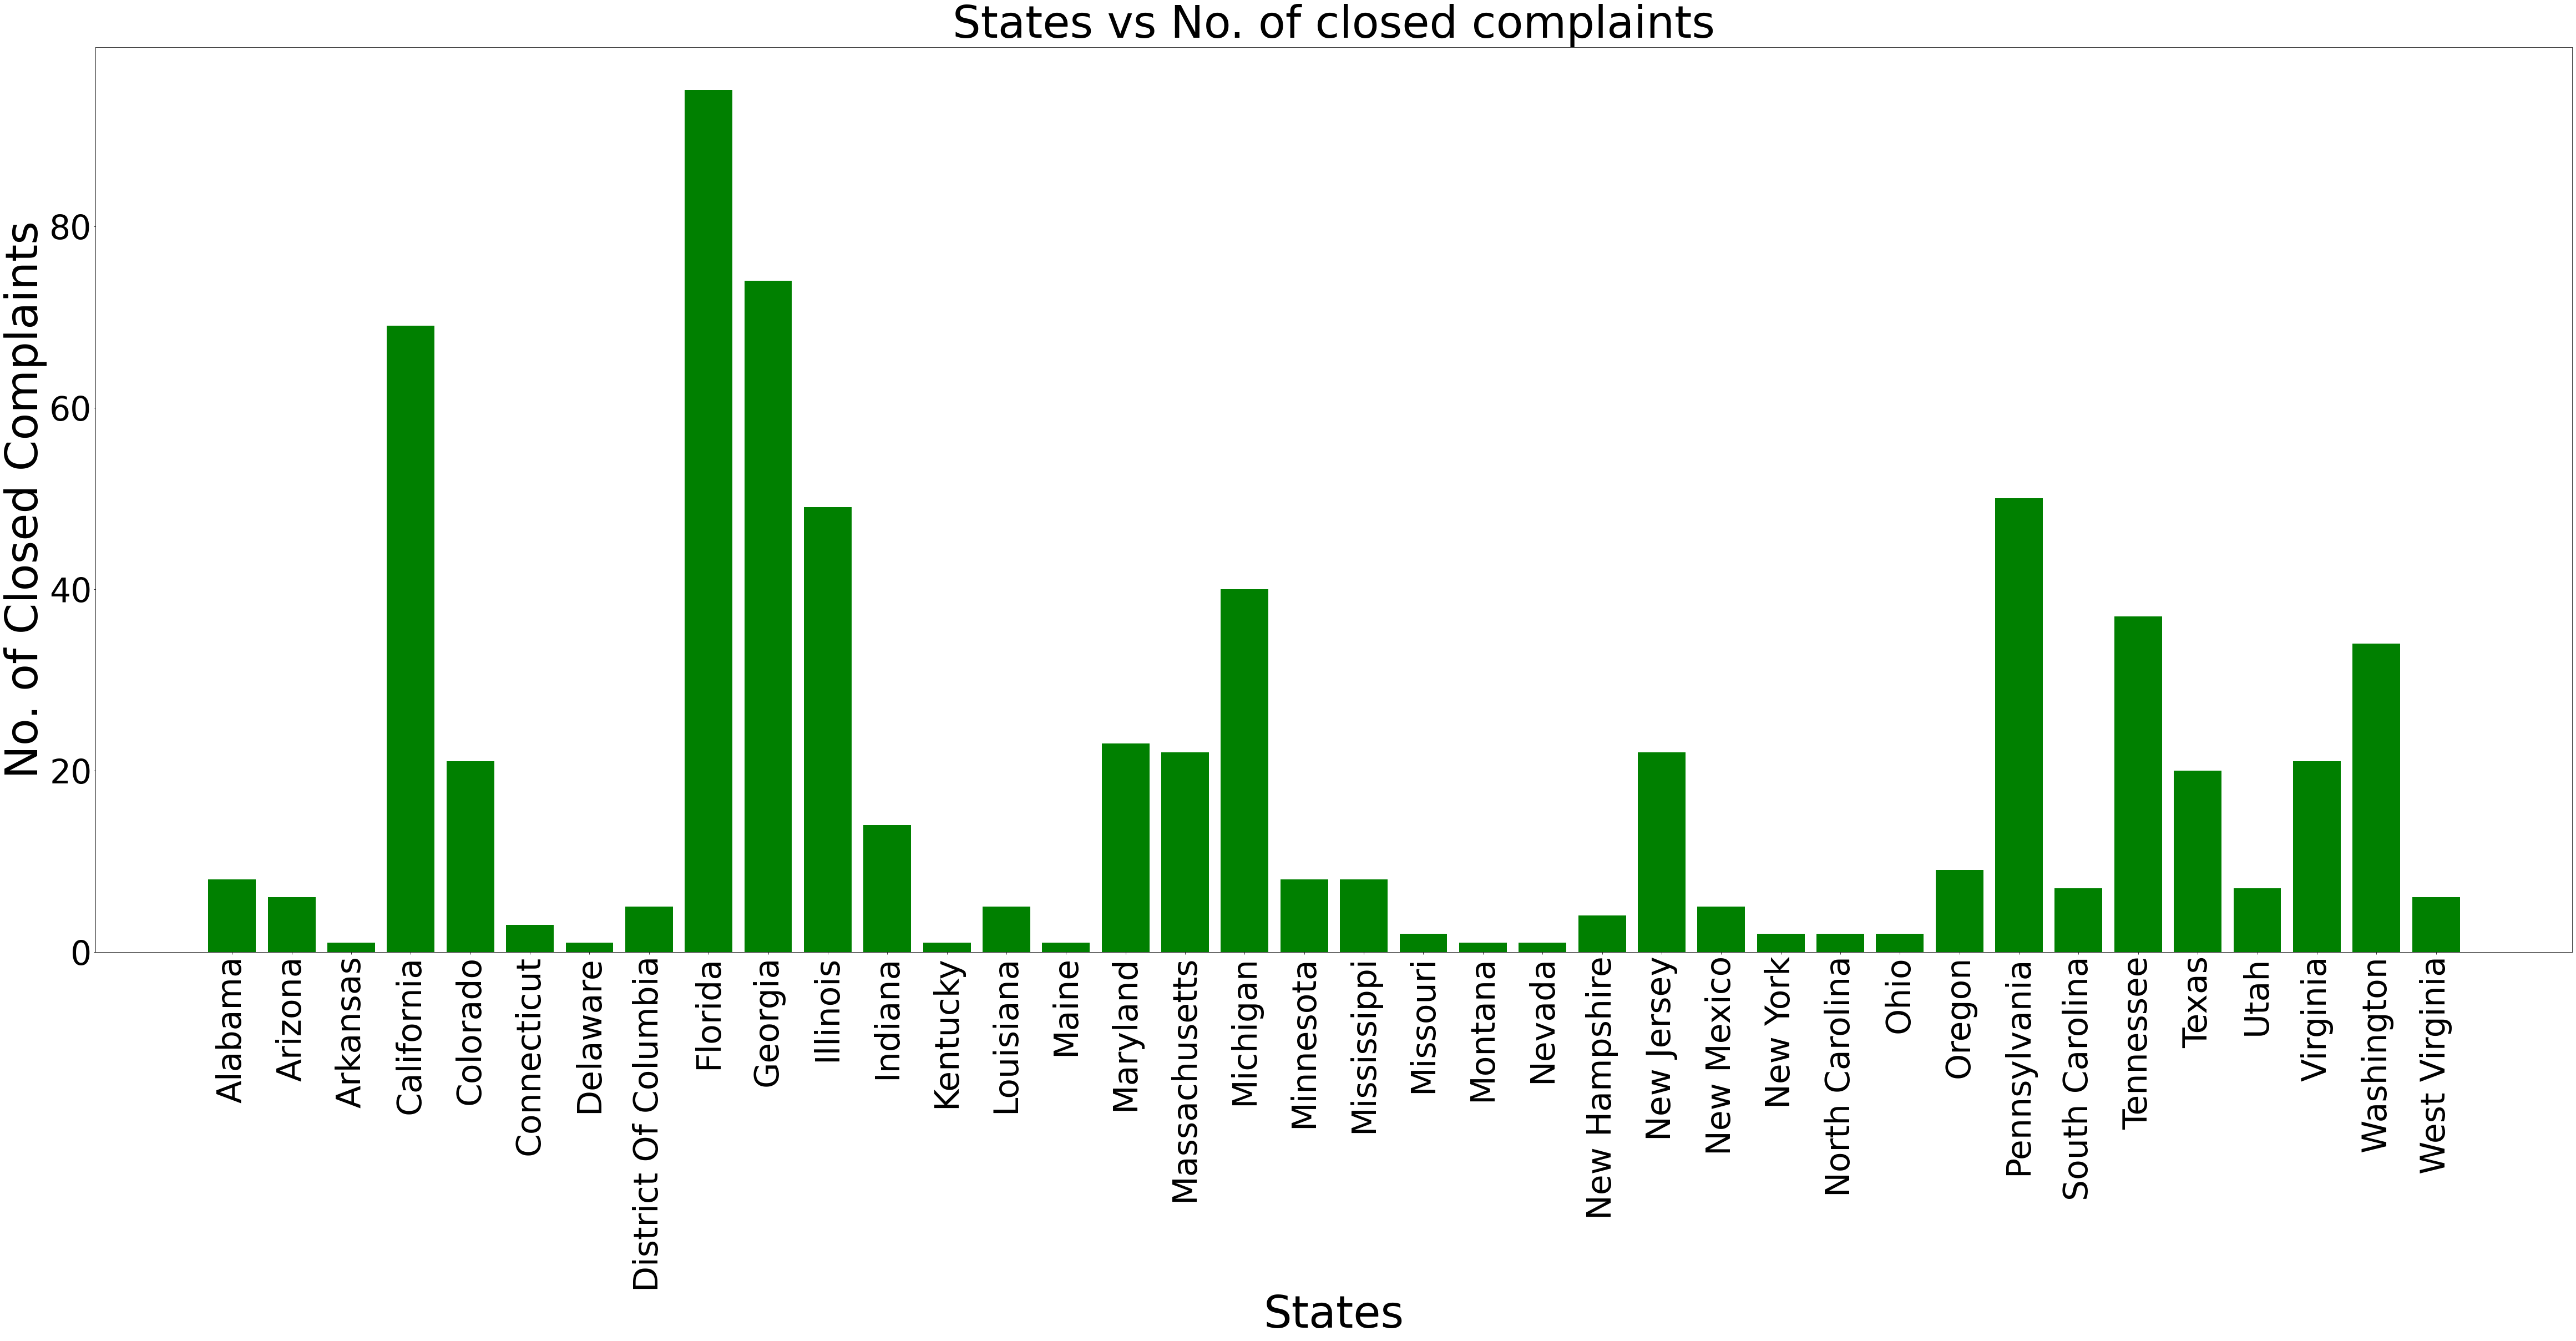

In [19]:

fig = plt.figure(figsize = (80, 30)) 
  
# creating the bar plot 
plt.bar(country_closed, closed, color ='green',  
        width = 0.8) 
plt.yticks(fontsize = 60)
plt.xticks(rotation = 90,fontsize = 60) 
plt.xlabel("States",fontsize = 80) 
plt.ylabel("No. of Closed Complaints",fontsize = 80) 
plt.title("States vs No. of closed complaints",fontsize = 80) 
plt.show()

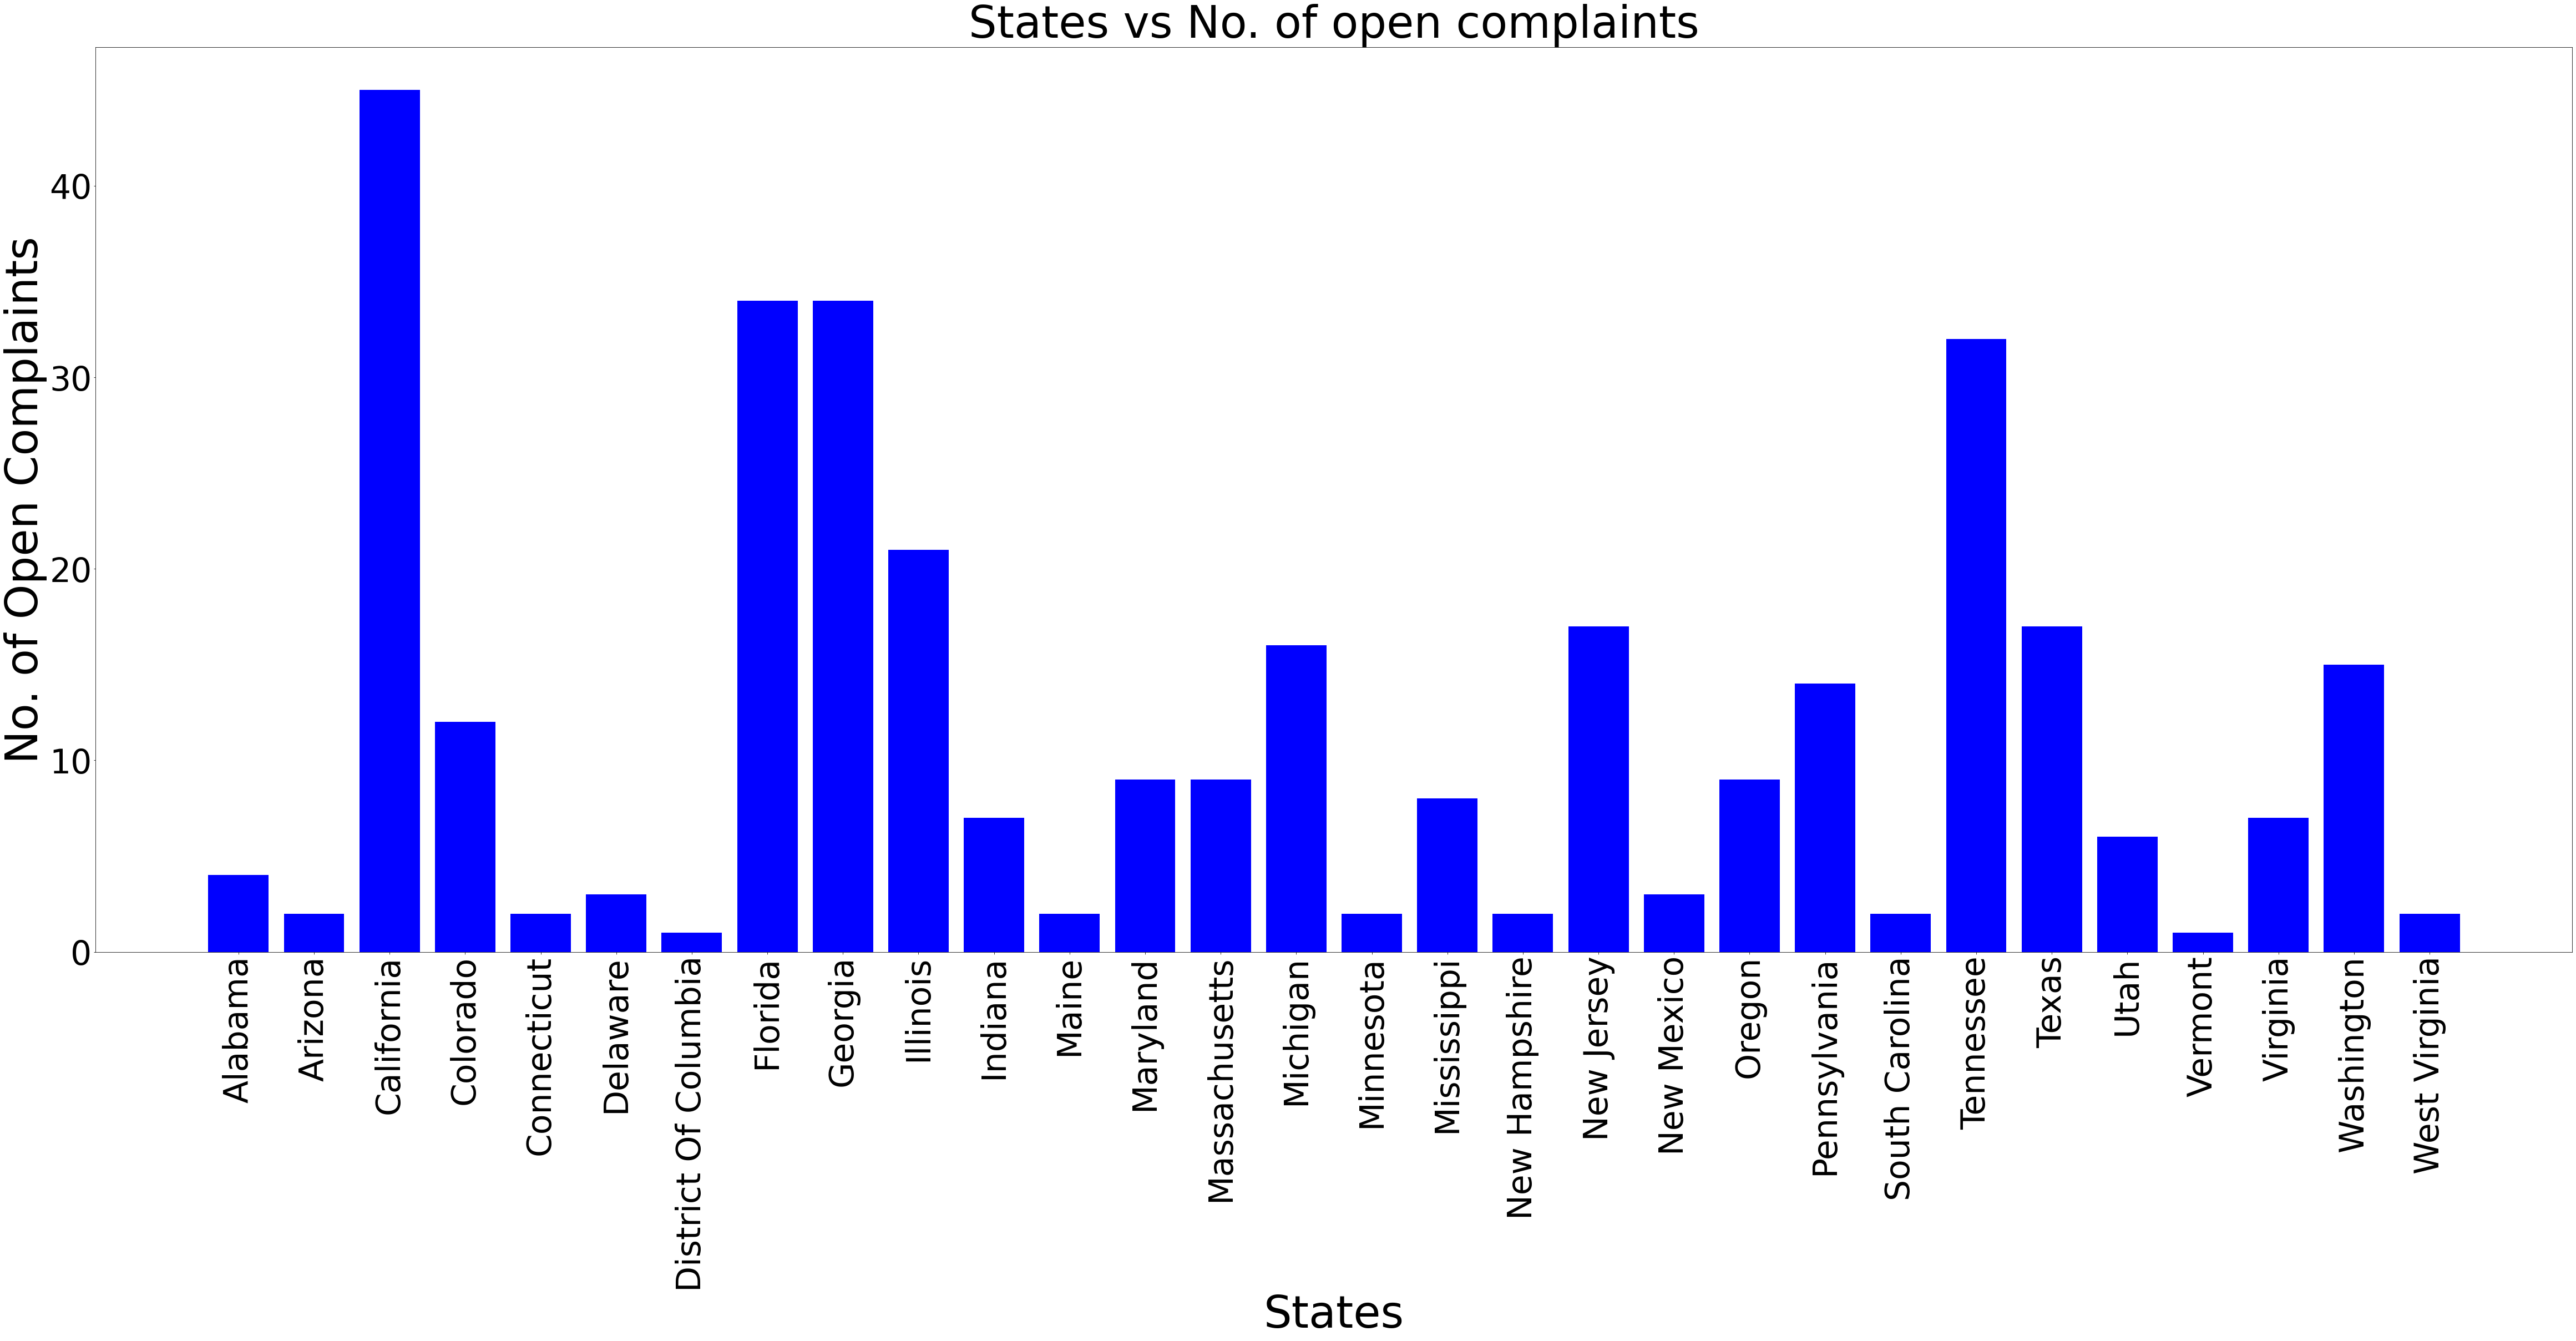

In [22]:

fig = plt.figure(figsize = (80, 30)) 
  
# creating the bar plot 
plt.bar(country_open, Open, color ='blue',  
        width = 0.8) 
plt.yticks(fontsize = 60)
plt.xticks(rotation = 90,fontsize = 60) 
plt.xlabel("States",fontsize = 80) 
plt.ylabel("No. of Open Complaints",fontsize = 80) 
plt.title("States vs No. of open complaints",fontsize = 80) 
plt.show()

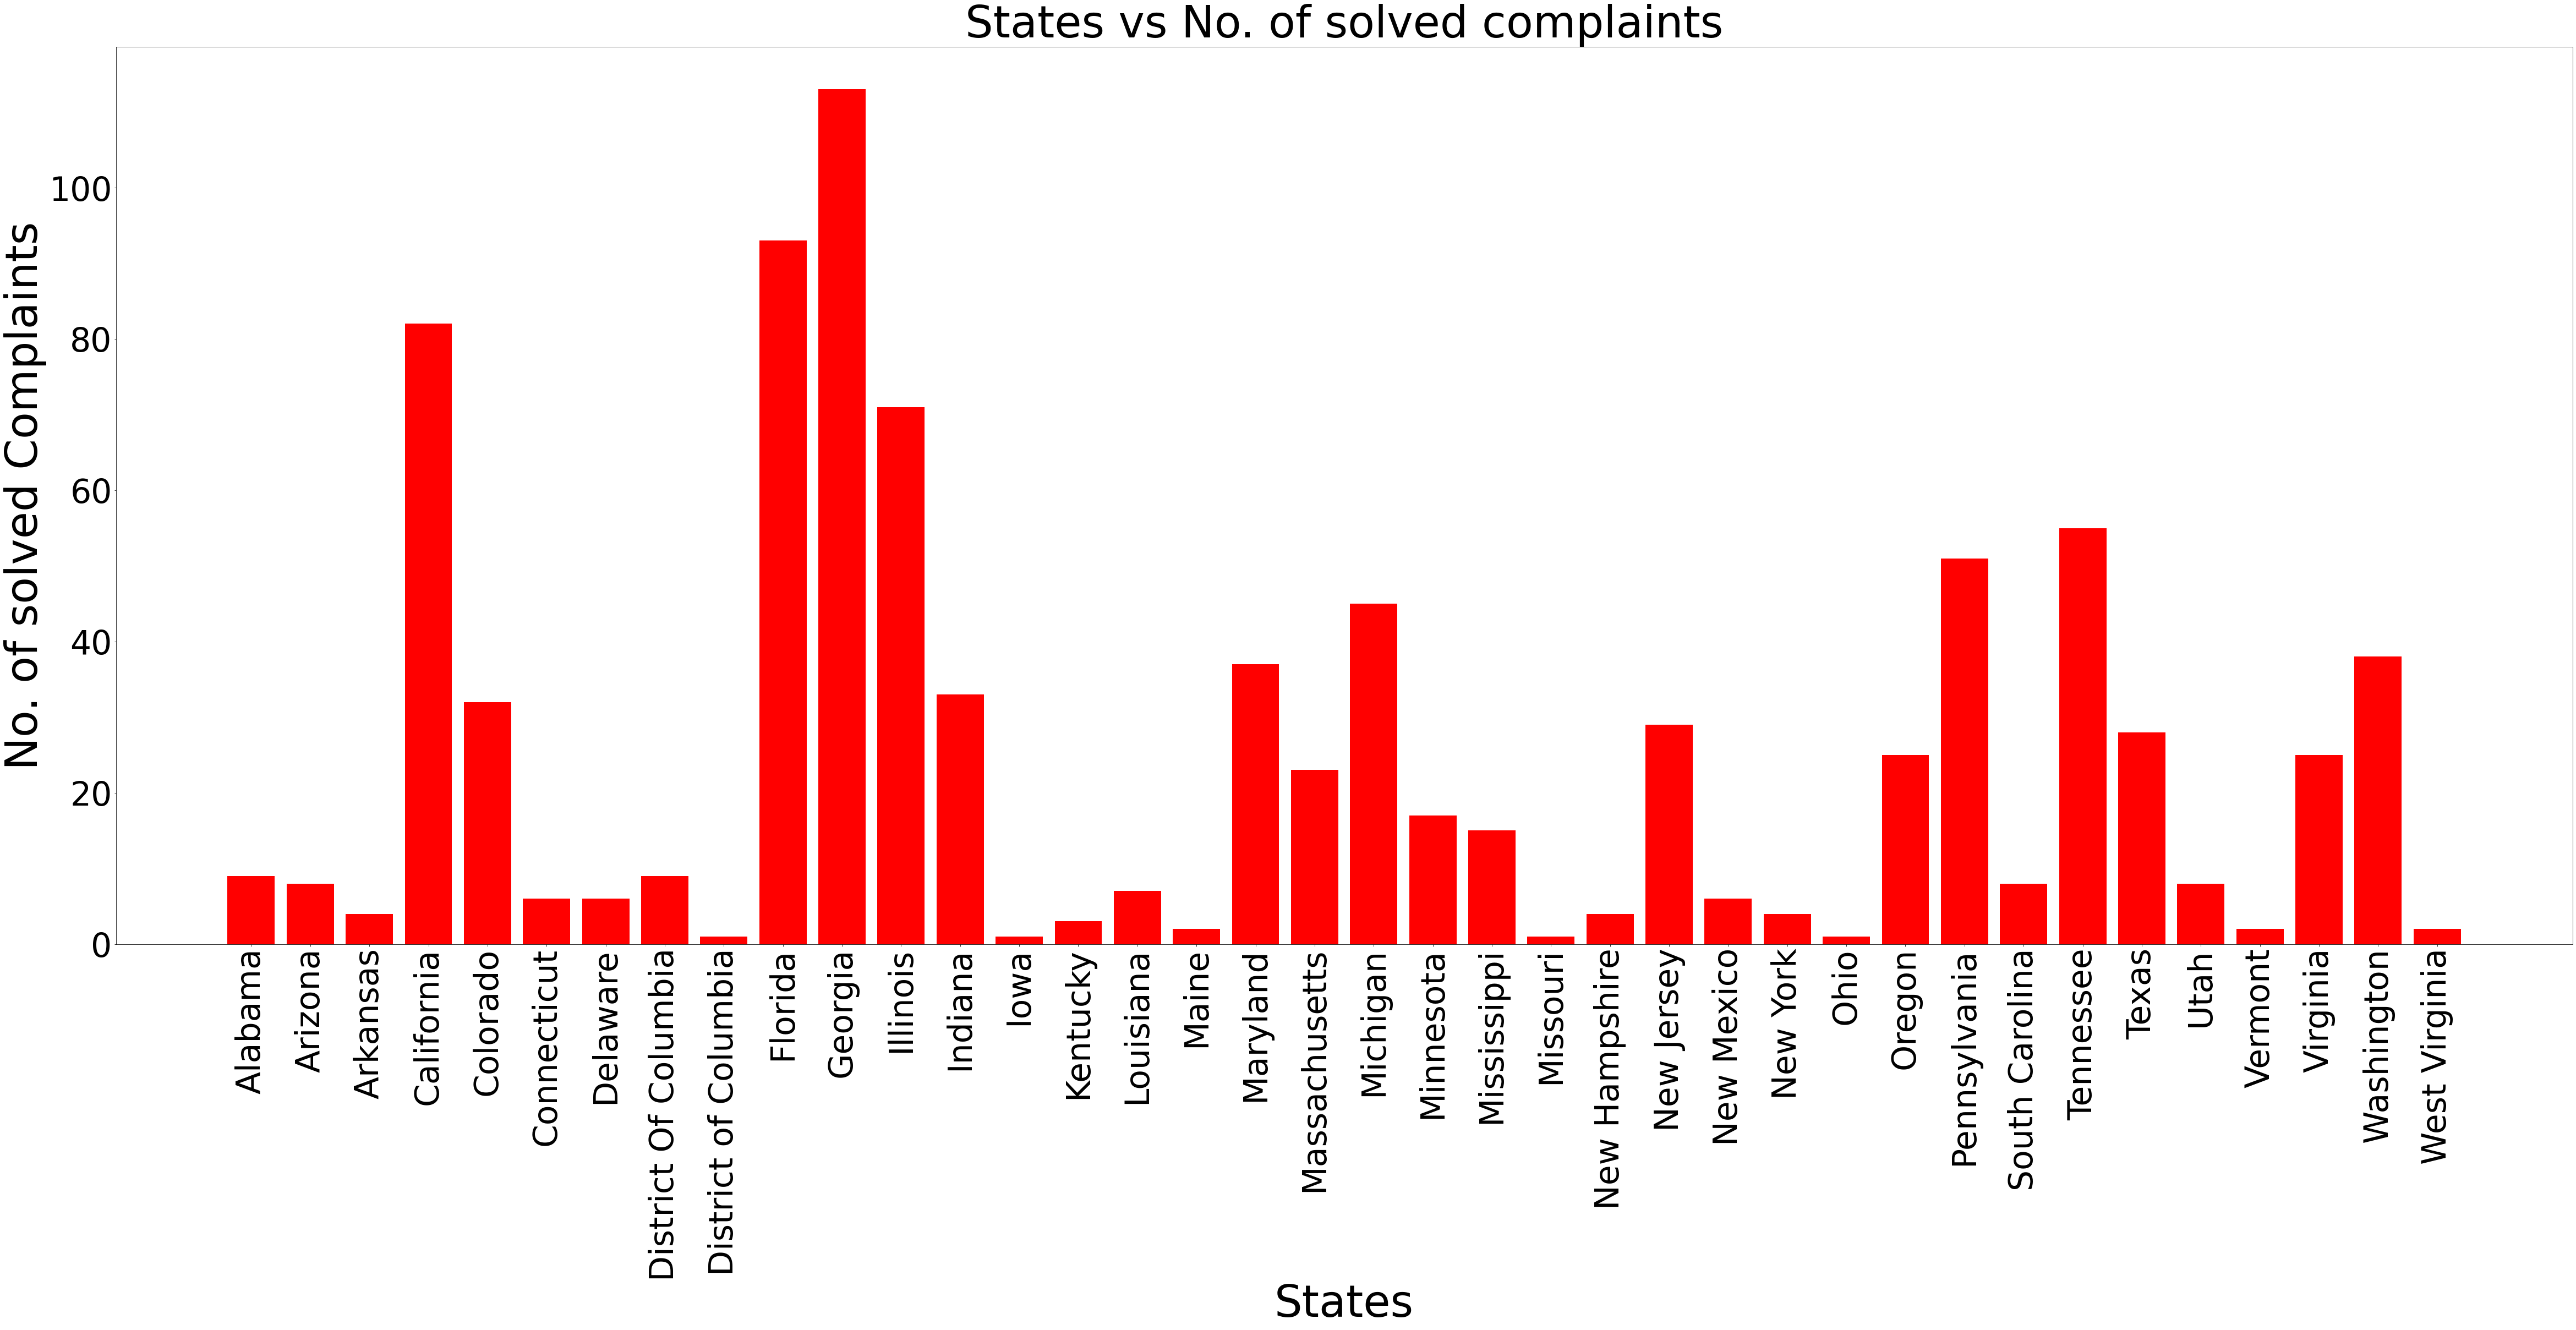

In [24]:

fig = plt.figure(figsize = (80, 30)) 
  
# creating the bar plot 
plt.bar(country_solved, solved, color ='red',  
        width = 0.8) 
plt.yticks(fontsize = 60)
plt.xticks(rotation = 90,fontsize = 60) 
plt.xlabel("States",fontsize = 80) 
plt.ylabel("No. of solved Complaints",fontsize = 80) 
plt.title("States vs No. of solved complaints",fontsize = 80) 
plt.show()

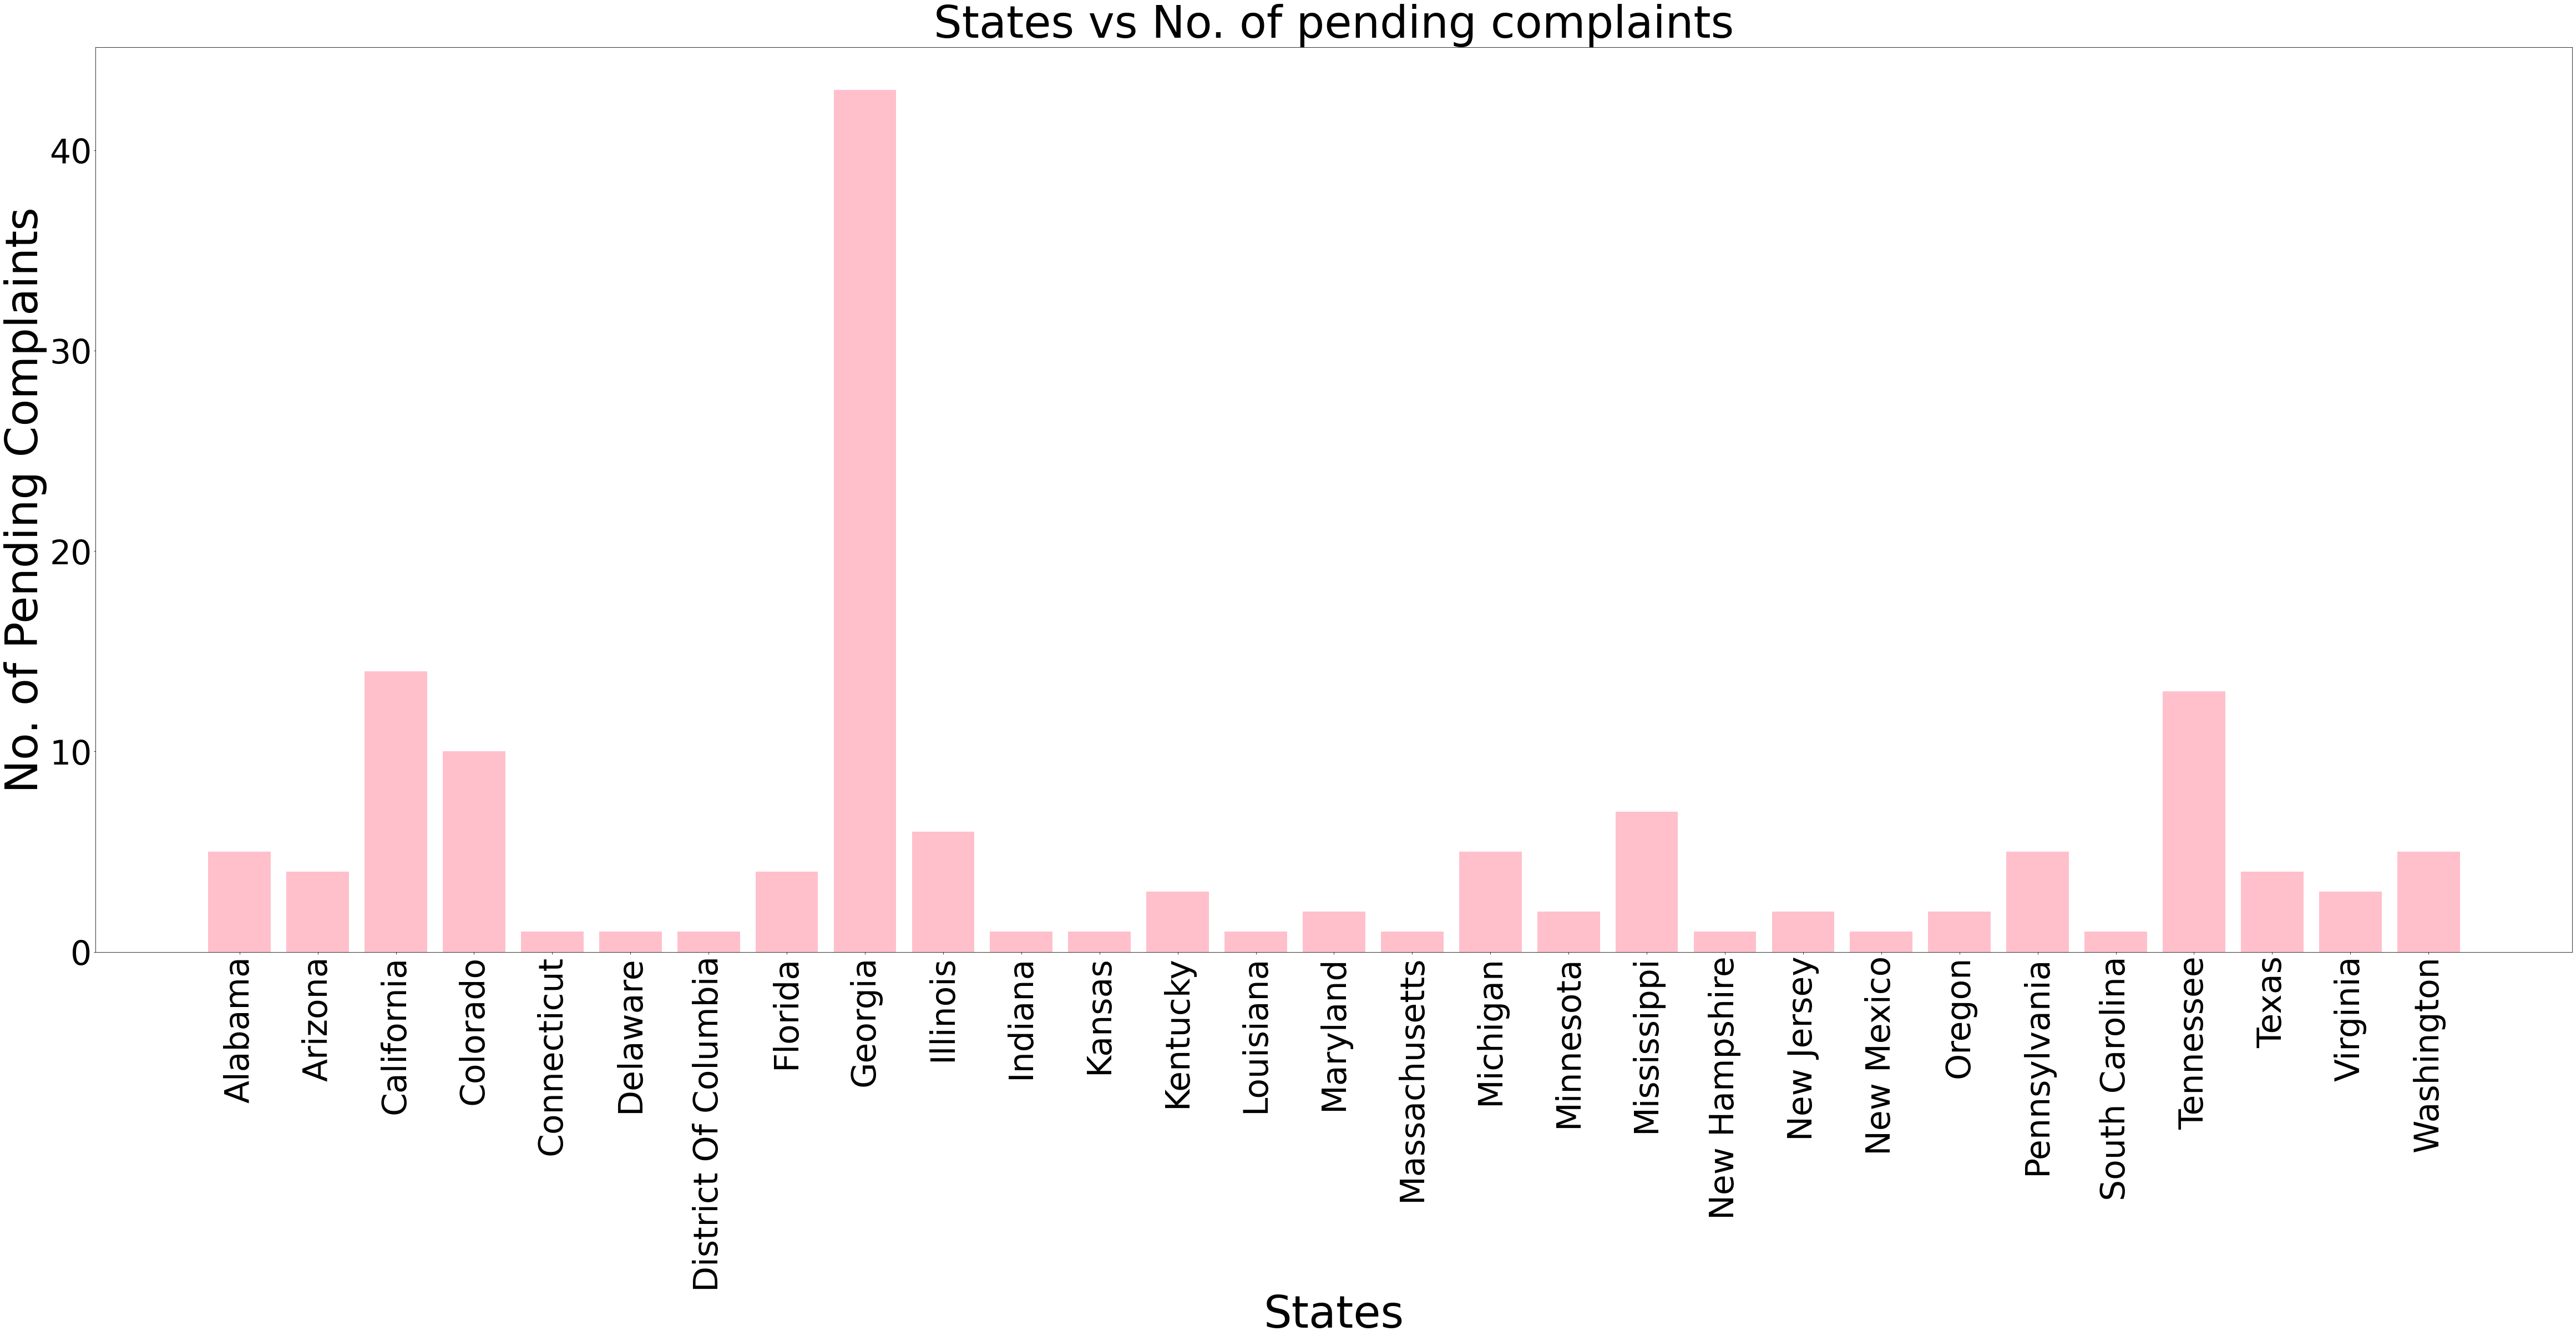

In [25]:

fig = plt.figure(figsize = (80, 30)) 
  
# creating the bar plot 
plt.bar(country_pending, pending, color ='pink',  
        width = 0.8) 
plt.yticks(fontsize = 60)
plt.xticks(rotation = 90,fontsize = 60) 
plt.xlabel("States",fontsize = 80) 
plt.ylabel("No. of Pending Complaints",fontsize = 80) 
plt.title("States vs No. of pending complaints",fontsize = 80) 
plt.show()

## 5. Report which state has registered maximum and minimum complaint


In [26]:
# no of complaints in different states
df["State"].value_counts()

Georgia                 264
Florida                 226
California              210
Illinois                147
Tennessee               137
Pennsylvania            120
Michigan                106
Washington               92
Colorado                 75
Maryland                 71
New Jersey               70
Texas                    69
Virginia                 56
Massachusetts            55
Indiana                  55
Oregon                   45
Mississippi              38
Minnesota                29
Alabama                  26
Utah                     21
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Connecticut              12
New Hampshire            11
Delaware                 11
West Virginia            10
Kentucky                  7
New York                  6
Arkansas                  5
Maine                     5
Ohio                      3
Missouri                  3
Vermont             

### From the above table, it is easily observed that maximum complaints are registered in "GEORGIA" and minimum complaints (i.e only 1) is registered in "Kansas","District of Columbia", "lowa", "Nevada", "Montana".

## 6. Which state has the highest and lowest percentage of unresolved complaints

In [27]:
# printing the dictionary having keys as countries and values as resolved complaints.
print(res)

{'Maryland': 60, 'Georgia': 187, 'Michigan': 85, 'California': 151, 'New Mexico': 11, 'Indiana': 47, 'Virginia': 46, 'Illinois': 120, 'Pennsylvania': 101, 'Oregon': 34, 'Massachusetts': 45, 'New Hampshire': 8, 'Minnesota': 25, 'Tennessee': 92, 'Florida': 188, 'Alabama': 17, 'Washington': 72, 'Colorado': 53, 'Texas': 48, 'New York': 6, 'New Jersey': 51, 'Maine': 3, 'West Virginia': 8, 'Montana': 1, 'Mississippi': 23, 'Connecticut': 9, 'Vermont': 2, 'Kentucky': 4, 'South Carolina': 15, 'Ohio': 3, 'Utah': 15, 'Delaware': 7, 'Missouri': 3, 'Arkansas': 5, 'Nevada': 1, 'Louisiana': 12, 'Kansas': 0, 'Arizona': 14, 'North Carolina': 2, 'District Of Columbia': 14, 'District of Columbia': 1, 'Iowa': 1}


In [28]:
# printing the dictionary having keys as countries and values as unresolved complaints.
print(unres)

{'Maryland': 11, 'Georgia': 77, 'Michigan': 21, 'California': 59, 'New Mexico': 4, 'Indiana': 8, 'Virginia': 10, 'Illinois': 27, 'Pennsylvania': 19, 'Oregon': 11, 'Massachusetts': 10, 'New Hampshire': 3, 'Minnesota': 4, 'Tennessee': 45, 'Florida': 38, 'Alabama': 9, 'Washington': 20, 'Colorado': 22, 'Texas': 21, 'New York': 0, 'New Jersey': 19, 'Maine': 2, 'West Virginia': 2, 'Montana': 0, 'Mississippi': 15, 'Connecticut': 3, 'Vermont': 1, 'Kentucky': 3, 'South Carolina': 3, 'Ohio': 0, 'Utah': 6, 'Delaware': 4, 'Missouri': 0, 'Arkansas': 0, 'Nevada': 0, 'Louisiana': 1, 'Kansas': 1, 'Arizona': 6, 'North Carolina': 0, 'District Of Columbia': 2, 'District of Columbia': 0, 'Iowa': 0}


In [29]:
# printing the dictionary having keys as countries and values as total complaints.
print(total)

{'Maryland': 71, 'Georgia': 264, 'Michigan': 106, 'California': 210, 'New Mexico': 15, 'Indiana': 55, 'Virginia': 56, 'Illinois': 147, 'Pennsylvania': 120, 'Oregon': 45, 'Massachusetts': 55, 'New Hampshire': 11, 'Minnesota': 29, 'Tennessee': 137, 'Florida': 226, 'Alabama': 26, 'Washington': 92, 'Colorado': 75, 'Texas': 69, 'New York': 6, 'New Jersey': 70, 'Maine': 5, 'West Virginia': 10, 'Montana': 1, 'Mississippi': 38, 'Connecticut': 12, 'Vermont': 3, 'Kentucky': 7, 'South Carolina': 18, 'Ohio': 3, 'Utah': 21, 'Delaware': 11, 'Missouri': 3, 'Arkansas': 5, 'Nevada': 1, 'Louisiana': 13, 'Kansas': 1, 'Arizona': 20, 'North Carolina': 2, 'District Of Columbia': 16, 'District of Columbia': 1, 'Iowa': 1}


In [30]:
# finding resolved and unresolved complaints percentage
res_percentage = {}
unres_percentage = {}
for i in df["State"]:
    res_percentage[i] = 0
    unres_percentage[i] = 0
for j in res.items():
    res_percentage[j[0]] = (res[j[0]]/total[j[0]])*100
for k in unres.items():
    unres_percentage[k[0]] = (unres[k[0]]/total[k[0]])*100

In [31]:
# printing the dictionary having keys as countries and values as % of resolved complaints.
print(res_percentage)

{'Maryland': 84.50704225352112, 'Georgia': 70.83333333333334, 'Michigan': 80.18867924528303, 'California': 71.9047619047619, 'New Mexico': 73.33333333333333, 'Indiana': 85.45454545454545, 'Virginia': 82.14285714285714, 'Illinois': 81.63265306122449, 'Pennsylvania': 84.16666666666667, 'Oregon': 75.55555555555556, 'Massachusetts': 81.81818181818183, 'New Hampshire': 72.72727272727273, 'Minnesota': 86.20689655172413, 'Tennessee': 67.15328467153284, 'Florida': 83.1858407079646, 'Alabama': 65.38461538461539, 'Washington': 78.26086956521739, 'Colorado': 70.66666666666667, 'Texas': 69.56521739130434, 'New York': 100.0, 'New Jersey': 72.85714285714285, 'Maine': 60.0, 'West Virginia': 80.0, 'Montana': 100.0, 'Mississippi': 60.526315789473685, 'Connecticut': 75.0, 'Vermont': 66.66666666666666, 'Kentucky': 57.14285714285714, 'South Carolina': 83.33333333333334, 'Ohio': 100.0, 'Utah': 71.42857142857143, 'Delaware': 63.63636363636363, 'Missouri': 100.0, 'Arkansas': 100.0, 'Nevada': 100.0, 'Louisian

In [32]:
# printing the dictionary having keys as countries and values as % of unresolved complaints.
print(unres_percentage)

{'Maryland': 15.492957746478872, 'Georgia': 29.166666666666668, 'Michigan': 19.81132075471698, 'California': 28.095238095238095, 'New Mexico': 26.666666666666668, 'Indiana': 14.545454545454545, 'Virginia': 17.857142857142858, 'Illinois': 18.367346938775512, 'Pennsylvania': 15.833333333333332, 'Oregon': 24.444444444444443, 'Massachusetts': 18.181818181818183, 'New Hampshire': 27.27272727272727, 'Minnesota': 13.793103448275861, 'Tennessee': 32.846715328467155, 'Florida': 16.8141592920354, 'Alabama': 34.61538461538461, 'Washington': 21.73913043478261, 'Colorado': 29.333333333333332, 'Texas': 30.434782608695656, 'New York': 0.0, 'New Jersey': 27.142857142857142, 'Maine': 40.0, 'West Virginia': 20.0, 'Montana': 0.0, 'Mississippi': 39.473684210526315, 'Connecticut': 25.0, 'Vermont': 33.33333333333333, 'Kentucky': 42.857142857142854, 'South Carolina': 16.666666666666664, 'Ohio': 0.0, 'Utah': 28.57142857142857, 'Delaware': 36.36363636363637, 'Missouri': 0.0, 'Arkansas': 0.0, 'Nevada': 0.0, 'Lo

### countries having highest percentage of unresolved complaints:
#### 1. Kansas (100%)
#### 2. Tennessee (32.84%)

### countries having lowest percentage of unresolved complaints:
#### 1. Iowa
#### 2. DOC 
#### 3. Nevada
#### 4. Arkansas
#### 5. Missouri
#### 6. Ohio
#### 7. Montana
#### 8. New York
#### 9. North Carolina
#### Note : all these countries have 0% of unresolved complaints.

## THANK YOU

# Question 2

In [35]:
# reading the second dataset
df_mart = pd.read_csv('Mart.csv')

In [36]:
df_mart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [37]:
# to check if there is any null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2077 non-null   object
 1   Customer Complaint           2077 non-null   object
 2   Date                         2077 non-null   object
 3   Date_month_year              2077 non-null   object
 4   Time                         2077 non-null   object
 5   Received Via                 2077 non-null   object
 6   City                         2077 non-null   object
 7   State                        2077 non-null   object
 8   Zip code                     2077 non-null   int64 
 9   Status                       2077 non-null   object
 10  Filing on Behalf of Someone  2077 non-null   object
 11  month                        2077 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 194.8+ KB


## 1. Which store has maximum sales

In [38]:
s = df_mart[df_mart["Store"] == 1]["Weekly_Sales"].sum()

In [40]:
# calculating the sales of different stores
sales = {}
for i in range(1,46):
    sales[i] = df_mart[df_mart["Store"] == i]["Weekly_Sales"].sum()

In [42]:
# printing the total sales of different stores
sales

{1: 222402808.85,
 2: 275382440.97999996,
 3: 57586735.06999999,
 4: 299543953.38,
 5: 45475688.900000006,
 6: 223756130.64000002,
 7: 81598275.14,
 8: 129951181.12999998,
 9: 77789218.99000001,
 10: 271617713.89,
 11: 193962786.8,
 12: 144287230.15,
 13: 286517703.8,
 14: 288999911.34000003,
 15: 89133683.92,
 16: 74252425.39999999,
 17: 127782138.83000003,
 18: 155114734.21000004,
 19: 206634862.09999996,
 20: 301397792.46000004,
 21: 108117878.91999999,
 22: 147075648.57,
 23: 198750617.85000002,
 24: 194016021.28000003,
 25: 101061179.16999999,
 26: 143416393.79,
 27: 253855916.88,
 28: 189263680.57999998,
 29: 77141554.30999999,
 30: 62716885.120000005,
 31: 199613905.5,
 32: 166819246.16000003,
 33: 37160221.95999999,
 34: 138249763.0,
 35: 131520672.08,
 36: 53412214.97,
 37: 74202740.32,
 38: 55159626.42,
 39: 207445542.46999997,
 40: 137870309.79,
 41: 181341934.89,
 42: 79565752.42999999,
 43: 90565435.41,
 44: 43293087.84,
 45: 112395341.42000002}

In [43]:
# finding the store having maximun sales
mx = 0
store = 0
for k in sales.items():
    if(k[1] > mx):
        mx = k[1]
        store = k[0]
print(store)

20


### so store 20 has maximum sales

## 2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation (coefficient of variation)

In [45]:
# total number of stores
df_mart["Store"].nunique()

45

In [46]:
# calculating the coefficient of variation and store having maximum and minimum standard deviation
mx_std_dev = 0;
mn_std_dev = 1000000000;
mx_store = 0
mn_store = 0
coeff = 0
print("The Coefficient of variations for stores are as follows :")
for i in range(1,46):
    std = df_mart[df_mart["Store"] == i].std()[1]
    mean = df_mart[df_mart["Store"] == i].mean()[1]
    if(std > mx_std_dev):
        mx_std_dev = std
        mx_store = i
    if(std < mn_std_dev):
        mn_std_dev = std
        mn_store = i
    coeff = (std/mean) *100
    print(i,coeff)
print("The store having maximum standard deviation is :",mx_store,"With standard deviation",mx_std_dev)
print("The store having minimum standard deviation is :",mn_store,"With standard deviation",mn_std_dev)

The Coefficient of variations for stores are as follows :
1 10.02921226813075
2 12.34238763319183
3 11.502140735338804
4 12.708253937002839
5 11.866844091939742
6 13.582285902663829
7 19.730468653665728
8 11.695283213906869
9 12.689546764678369
10 15.913349066639102
11 12.22618336004468
12 13.792532199977735
13 13.251362792719142
14 15.713673600948338
15 19.33839877822955
16 16.51806549478143
17 12.552067141232682
18 16.28454974226666
19 13.26801153482639
20 13.090268561738489
21 17.029239217349453
22 15.678287578148591
23 17.9721149197535
24 12.363737661375541
25 15.98604024072346
26 11.011066299216315
27 13.515544496695316
28 13.73297416512492
29 18.374246746816343
30 5.2008038555445175
31 9.016105262945947
32 11.831049176166283
33 9.286835290692942
34 10.82252383219858
35 22.968111389976414
36 16.25789124577327
37 4.208411895180792
38 11.087544692154392
39 14.990779108026006
40 12.342978096269446
41 14.817711243560769
42 9.03353280932982
43 6.4103629270192375
44 8.179331054568062
45

### The store having maximum standard deviation is : 14 With standard deviation 317569.9494755083
### The store having minimum standard deviation is : 37 With standard deviation 21837.4611900489

## 3. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [48]:
# mean sales of non holiday season for all stores together
mean_non_holiday = df_mart[df_mart["Holiday_Flag"] == 0].mean()[1]

In [49]:
# the mean of sales in non holiday season
mean_non_holiday

1041256.3802088555

In [51]:
# calculating the sales of different holiday seasons which have sales more than the mean sales of non holiday season
l = ["12-02-2010","11-02-2011","10-02-2012","10-09-2010","09-09-2011","07-09-2012","26-11-2010","31-12-2010","30-12-2011"]
for i in l:
    sales_holiday_stores = df_mart[df_mart["Date"] == i]["Weekly_Sales"].mean()
    if(sales_holiday_stores > mean_non_holiday):
        print("holiday Season : ",i,"||","Sales : ",sales_holiday_stores)

holiday Season :  12-02-2010 || Sales :  1074148.3917777783
holiday Season :  11-02-2011 || Sales :  1051915.3953333334
holiday Season :  10-02-2012 || Sales :  1111320.176
holiday Season :  07-09-2012 || Sales :  1074001.318
holiday Season :  26-11-2010 || Sales :  1462688.960888889


## 4. Provide a monthly and 6 month view of sales in units and give insights

In [75]:
# adding month and year column
df_mart['Month'] = df_mart["Date"].apply(lambda x : x.split('-')[1])
df_mart['Year'] = df_mart["Date"].apply(lambda x : x.split('-')[2])

In [78]:
df_mart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03,2010


In [79]:
# making year list
year_list = df_mart["Year"].unique().tolist()

In [80]:
year_list

['2010', '2011', '2012']

In [81]:
# making monthly list
month_list = df_mart["Month"].unique().tolist()

In [82]:
month_list

['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '01']

In [83]:
# calculating the monthly sales
monthly_sales = {}
for i in year_list:
    for j in month_list:
        monthly_sales[j+"-"+i] = df_mart[(df_mart["Month"] == j) & (df_mart["Year"] == i)]["Weekly_Sales"].sum()

### tabular data for monthly sales

In [84]:
# printing the month vs it's corresponding sales.
monthly_sales

{'02-2010': 190332983.04000002,
 '03-2010': 181919802.5,
 '04-2010': 231412368.05,
 '05-2010': 186710934.34000003,
 '06-2010': 192246172.36,
 '07-2010': 232580125.98,
 '08-2010': 187640110.89,
 '09-2010': 177267896.37,
 '10-2010': 217161824.02,
 '11-2010': 202853370.14,
 '12-2010': 288760532.72,
 '01-2010': 0.0,
 '02-2011': 186331327.87,
 '03-2011': 179356448.29000002,
 '04-2011': 226526510.97,
 '05-2011': 181648158.16,
 '06-2011': 189773385.19,
 '07-2011': 229911398.87,
 '08-2011': 188599332.25,
 '09-2011': 220847738.42000002,
 '10-2011': 183261283.14999998,
 '11-2011': 210162354.87,
 '12-2011': 288078102.48,
 '01-2011': 163703966.82999998,
 '02-2012': 192063579.54000002,
 '03-2012': 231509650.49,
 '04-2012': 188920905.95,
 '05-2012': 188766479.45,
 '06-2012': 240610329.28999996,
 '07-2012': 187509452.39999998,
 '08-2012': 236850765.68,
 '09-2012': 180645544.47,
 '10-2012': 184361680.42000002,
 '11-2012': 0.0,
 '12-2012': 0.0,
 '01-2012': 168894471.66}

In [114]:
X = []
Y = []
for i in monthly_sales.items():
    X.append(i[0])
    Y.append(i[1])

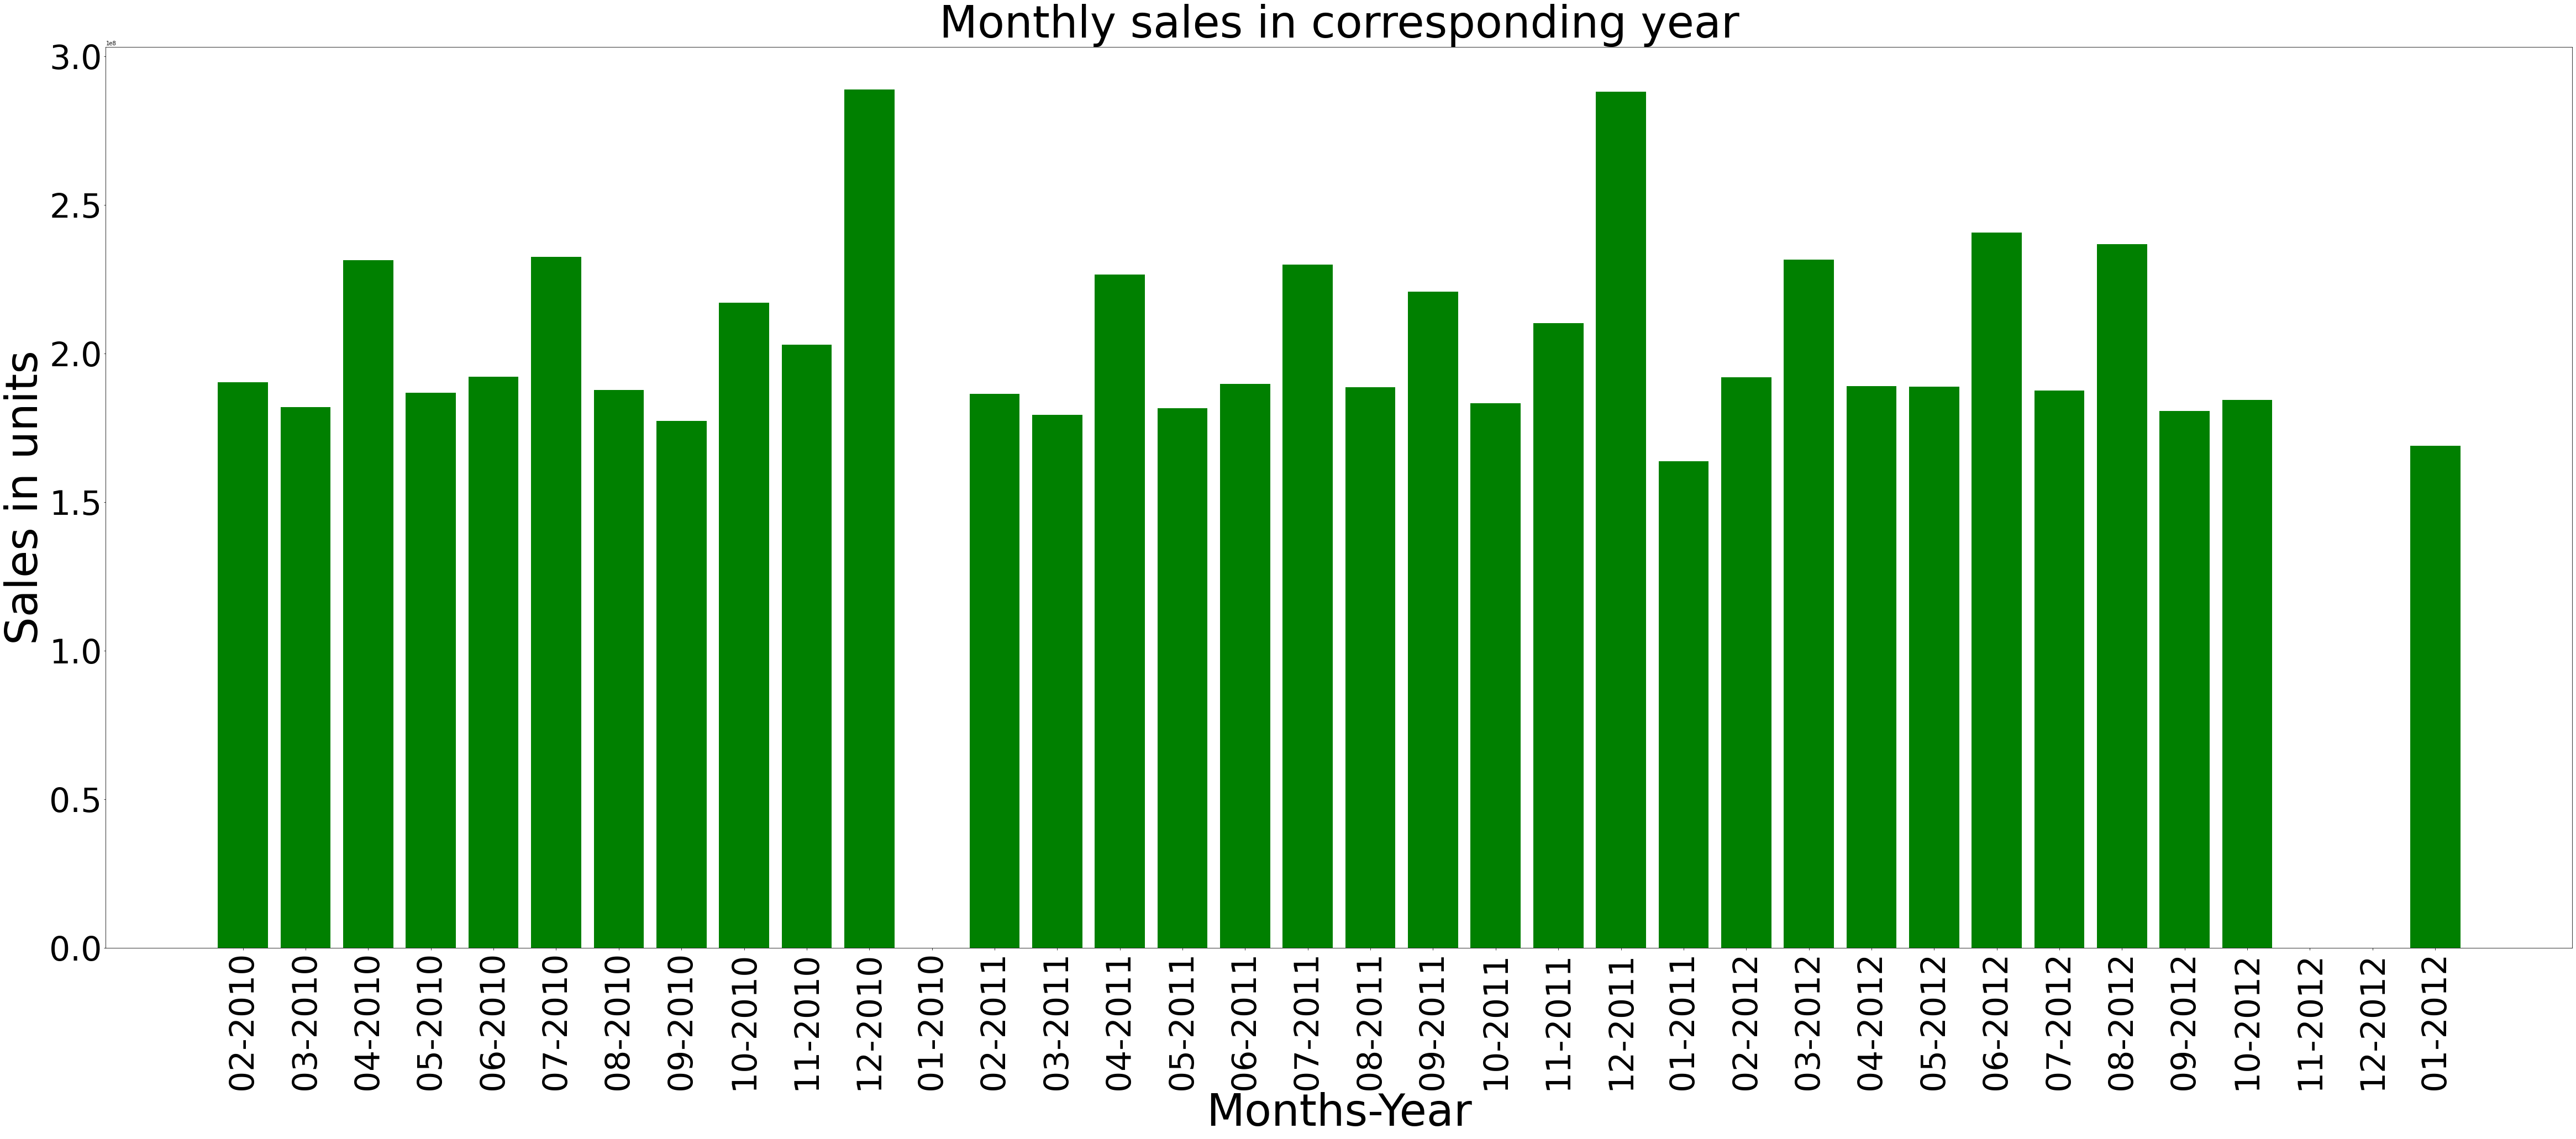

In [116]:

fig = plt.figure(figsize = (80, 30)) 
  
# creating the bar plot 
plt.bar(X, Y, color ='green',  
        width = 0.8) 
plt.yticks(fontsize = 60)
plt.xticks(rotation = 90,fontsize = 60) 
plt.xlabel("Months-Year",fontsize = 80) 
plt.ylabel("Sales in units",fontsize = 80) 
plt.title("Monthly sales in corresponding year",fontsize = 80) 
plt.show()

### Insight : the maximum sales in both year 2010 and  2011 are found in the month of december..may be because these are the closing dates and stores provide the maximum sales in these months. Moreover due to christmas and new year people purchase more goods.

In [85]:
# calculating half yearly sales. Due to the data constraints the last value if from August 2012 to October 2012 only i.e 3 months
half_yearly_sales = {}
half_yearly_sales["Feb-2010 to July-2010"] = monthly_sales["02-2010"]+monthly_sales["03-2010"]+monthly_sales["04-2010"]+monthly_sales["05-2010"]+monthly_sales["06-2010"]+monthly_sales["07-2010"]
half_yearly_sales["Aug-2010 to Jan-2011"] = monthly_sales["08-2010"]+monthly_sales["09-2010"]+monthly_sales["10-2010"]+monthly_sales["11-2010"]+monthly_sales["12-2010"]+monthly_sales["01-2011"]
half_yearly_sales["Feb-2011 to July-2011"] = monthly_sales["02-2011"]+monthly_sales["03-2011"]+monthly_sales["04-2011"]+monthly_sales["05-2011"]+monthly_sales["06-2011"]+monthly_sales["07-2011"]
half_yearly_sales["Aug-2011 to jan-2012"] = monthly_sales["08-2011"]+monthly_sales["09-2011"]+monthly_sales["10-2011"]+monthly_sales["11-2011"]+monthly_sales["12-2011"]+monthly_sales["01-2012"]
half_yearly_sales["Feb-2012 to July-2012"] = monthly_sales["02-2012"]+monthly_sales["03-2012"]+monthly_sales["04-2012"]+monthly_sales["05-2012"]+monthly_sales["06-2012"]+monthly_sales["07-2012"]
half_yearly_sales["Aug-2012 to Oct-2012"] = monthly_sales["08-2012"]+monthly_sales["09-2012"]+monthly_sales["10-2012"]

In [86]:
# half yearly sales
half_yearly_sales

{'Feb-2010 to July-2010': 1215202386.27,
 'Aug-2010 to Jan-2011': 1237387700.97,
 'Feb-2011 to July-2011': 1193547229.35,
 'Aug-2011 to jan-2012': 1259843282.8300002,
 'Feb-2012 to July-2012': 1229380397.12,
 'Aug-2012 to Oct-2012': 601857990.5699999}

# Statistical Model

## For store 2 develop Linear Regression model– Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales. 

In [88]:
# making the dataframe that contains entries of store 2 only
store2 = df_mart[df_mart["Store"] == 2]

In [89]:
store2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
143,2,05-02-2010,2136989.46,0,40.19,2.572,210.752605,8.324,02,2010
144,2,12-02-2010,2137809.50,1,38.49,2.548,210.897994,8.324,02,2010
145,2,19-02-2010,2124451.54,0,39.69,2.514,210.945160,8.324,02,2010
146,2,26-02-2010,1865097.27,0,46.10,2.561,210.975957,8.324,02,2010
147,2,05-03-2010,1991013.13,0,47.17,2.625,211.006754,8.324,03,2010


In [90]:
# importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [91]:
# reshape using numpy.
y = store2["Weekly_Sales"].values.reshape(-1,1)

In [92]:
print(y)

[[2136989.46]
 [2137809.5 ]
 [2124451.54]
 [1865097.27]
 [1991013.13]
 [1990483.78]
 [1946070.88]
 [1750197.81]
 [2066187.72]
 [1954689.21]
 [1874957.94]
 [1821990.93]
 [1802450.29]
 [2042581.71]
 [1880752.36]
 [1896937.1 ]
 [1957113.89]
 [2102539.93]
 [2025538.76]
 [2001636.96]
 [1939927.09]
 [2003940.64]
 [1880902.62]
 [1845879.79]
 [1781717.71]
 [1804246.16]
 [1991909.98]
 [1895601.05]
 [1964335.23]
 [1863840.49]
 [1904608.09]
 [1839128.83]
 [1793903.6 ]
 [1724557.22]
 [1827440.43]
 [1849921.44]
 [1794355.49]
 [1737947.64]
 [1802755.11]
 [1939061.41]
 [1916812.74]
 [1956739.17]
 [2658725.29]
 [2015781.27]
 [2378726.55]
 [2609166.75]
 [3436007.68]
 [1750434.55]
 [1758050.79]
 [1744193.58]
 [1751384.9 ]
 [1695371.68]
 [1929346.23]
 [2168041.61]
 [2080884.82]
 [1833511.08]
 [1981607.78]
 [1879107.31]
 [1902557.66]
 [1766162.05]
 [1800171.36]
 [1847552.61]
 [1856467.84]
 [1886339.6 ]
 [1745545.28]
 [1837743.6 ]
 [1838513.07]
 [1688281.86]
 [1797732.56]
 [1933756.21]
 [1929153.16]
 [1953

In [93]:
# features
X = store2.iloc[:,3:8].values

In [99]:
# making the object of class implementing Linear Regression 
model = LinearRegression()

In [100]:
# splitting the dataset into 80-20 format
XTrain,XTest,YTrain,YTest = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [101]:
print(XTrain.shape)
print(YTrain.shape)

(114, 5)
(114, 1)


In [102]:
# training (i.e fitting the line)
model.fit(XTrain,YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
# prediction over the unseen testing data
y_prediction = model.predict(XTest)
print(y_prediction)

[[1946426.32066277]
 [1879951.40417502]
 [1882260.89155458]
 [1909126.59112045]
 [1892200.14285578]
 [1997585.75845128]
 [1927578.52051966]
 [1813000.5457226 ]
 [1833659.49252555]
 [1999323.51369375]
 [2071612.75963028]
 [1896266.45746001]
 [1928436.96804825]
 [2092813.80122205]
 [1818429.20917997]
 [1925316.57926143]
 [1871939.28466764]
 [1904079.49057578]
 [1901651.0150834 ]
 [1896505.41482992]
 [1811046.25035841]
 [1953992.22854554]
 [1881372.17767078]
 [1902070.30684743]
 [1818201.52222804]
 [1930985.06653398]
 [1824031.3024909 ]
 [1969032.74561768]
 [1961000.05765377]]


In [104]:
# coefficients of different features in the hypothesis
print(model.coef_)

[[  58401.325891     -2238.23488176 -257714.5342688    54515.96326202
   281398.25517897]]


In [106]:
# intercept of the best fit line
print(model.intercept_)

[-11011203.59366687]


### The coefficients that are positive signifies that, as the value of the feature corresponding to this coefficient increases the value of dependent variable increases (i.e. sales in this case and vice versa.
### Similarly high value of the coefficient means the feature corresponding to this coefficient is more related to the dependent variable( i.e. sales in this case) and vice versa.

#### Therefore Holiday flag have positive coefficient with value 58401.325
#### Therefore Temperature have negative coefficient with value 2238.234
#### Therefore Fuel Price have negative coefficient with value 257714.534
#### Therefore CPI have positive coefficient with value 54515.963
#### Therefore Unemployment have positive coefficient with value 281398.255

# THANK YOU